# Cotton Disease Prediction using Incetion V3 Model


In [23]:
# Importing Required Libraries

from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from glob import glob
import numpy as np



In [3]:
!pip install opendatasets

In [1]:
import opendatasets as od
url = 'https://www.kaggle.com/janmejaybhoi/cotton-disease-dataset'
od.download(url)


  0%|          | 0.00/148M [00:00<?, ?B/s]

100%|██████████| 148M/148M [00:04<00:00, 33.9MB/s]


In [3]:
#Resizing all the images
IMAGE_SIZE = [224, 224]

## Creating Model

The base of the model is our inception model. We specify the imagesize +3 to convert it to a format of 224  *224 * 3 as the image has 3 channels R,G and B. Weights are assigned from imgenet.  This include_top = False means we do not include the flatten and output layers, just we are using the layers before it. It allows us to add our own flatten and output layers. They also skip the input layers.

In [4]:
conv_base = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


In [5]:
#Existing weights are not trained
for layer in conv_base.layers:
      layer.trainable = False

To identify the number of nodes required for the final layer. We count the number of classes in the dataset. This value is equal to the number of folders inside any of the test/train/valid folders. It is 4 here.

In [7]:
# output classes
folders = glob('/content/cotton-disease-dataset/Cotton Disease/train/*')
len(folders)

4

Now flatten the output layer of the base convolutional network. This flatten output is combined with a final dense layer that contains the neurons corresponding to the final prediction classes. In the final layer we use the ‘softmax’ activation function.

In [9]:
# Flatten layers 
x = Flatten()(conv_base.output)
# Add dense layers 
prediction = Dense(len(folders), activation='softmax')(x)

Now integrate the base model and the final layers we created for our target model. Model summary will give the summary of the model created that includes the layers, number of parameters, activation functions and so on.

In [10]:
# model 
model = Model(inputs=conv_base.input, outputs=prediction)
# model summary, number of trainable parameters 
model.summary ()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

Now compile the model by specifying the loss function and optimizer.

In [11]:
# compile the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

## Data Preperation and Model Fitting

Now we use the image data generator to supply the data along with the data augmentation. Data augmentation increases the number of data by introducing different transformations and this helps in reducing the overfitting.

In [13]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

# Validation data 
validation_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

# Test data 
test_datagen=ImageDataGenerator(rescale=1./255)

Now define your training set. For this, we need to specify the training directory, target image size, batch size, and the class mode. This make use of our data generator specified. So the augmentation will be performed automaticallly.

In [15]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/cotton-disease-dataset/Cotton Disease/train',
target_size = (224, 224),
batch_size = 32,
class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


Above code produces the below output. You can see that there are more images than the number of images actually present inside the folder. These images are generated by the data augmentation.

In [16]:
validation_set = validation_datagen.flow_from_directory('/content/cotton-disease-dataset/Cotton Disease/val',
target_size = (224, 224),
batch_size = 16,
class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/cotton-disease-dataset/Cotton Disease/test',
target_size = (224, 224),
batch_size = 32,
class_mode = 'categorical')

Found 253 images belonging to 4 classes.
Found 106 images belonging to 4 classes.


In the next step, we fit the model by specifying the training set, validation set and number of epochs. The number of epochs is set as 10 here.

In [17]:
history = model.fit_generator(training_set,validation_data=validation_set,epochs=9,
steps_per_epoch=len(training_set),
validation_steps=len(validation_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/9
61/61 [==============================] - 259s 4s/step - loss: 2.5289 - accuracy: 0.7427 - val_loss: 0.3940 - val_accuracy: 0.9091
Epoch 2/9
61/61 [==============================] - 254s 4s/step - loss: 0.5910 - accuracy: 0.8852 - val_loss: 0.9188 - val_accuracy: 0.8775
Epoch 3/9
61/61 [==============================] - 254s 4s/step - loss: 0.6844 - accuracy: 0.8954 - val_loss: 0.7449 - val_accuracy: 0.9012
Epoch 4/9
61/61 [==============================] - 255s 4s/step - loss: 0.4057 - accuracy: 0.9318 - val_loss: 0.5124 - val_accuracy: 0.8972
Epoch 5/9
61/61 [==============================] - 255s 4s/step - loss: 0.4639 - accuracy: 0.9241 - val_loss: 0.7315 - val_accuracy: 0.9012
Epoch 6/9
61/61 [==============================] - 255s 4s/step - loss: 0.5008 - accuracy: 0.9221 - val_loss: 0.8365 - val_accuracy: 0.9130
Epoch 7/9
61/61 [==============================] - 256s 4s/step - loss: 0.6443 - accuracy: 0.9134 - val_loss: 0.4085 - val_accuracy: 0.9249
Epoch 8/9
61/61 [===

## Plotting Accuracy and Loss


The accuracy and loss incurred is identified by plotting the graphs of both.



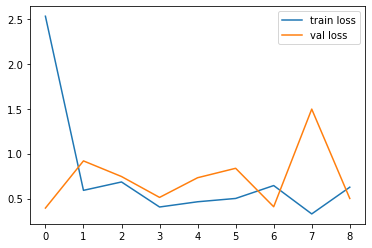

<Figure size 432x288 with 0 Axes>

In [19]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('Loss Plot')

In [20]:
#Saving the Model

model.save('inceptionv3_model.h5')


## Making the predictions

In [21]:
model_prediction = model.predict(test_set)
print(model_prediction)

[[8.51792248e-10 8.81205178e-12 1.00000000e+00 1.57120750e-09]
 [1.25041068e-16 1.00000000e+00 2.85031222e-29 4.30251209e-28]
 [5.50271384e-24 2.63035035e-23 5.26629808e-22 1.00000000e+00]
 [4.68404815e-15 1.04735475e-24 1.00000000e+00 6.60107177e-11]
 [1.92924046e-17 1.54180139e-14 7.33387222e-12 1.00000000e+00]
 [2.50812383e-33 1.00000000e+00 6.04417604e-30 5.12783220e-20]
 [9.99999046e-01 7.87534571e-26 9.51155585e-07 1.13090065e-17]
 [1.00000000e+00 1.49172150e-34 8.38638533e-23 1.99500010e-21]
 [9.45328176e-01 6.70430325e-08 5.46717271e-02 4.35266243e-17]
 [1.00000000e+00 3.04529668e-29 2.95345698e-13 1.84453993e-12]
 [5.95884019e-14 4.99777286e-07 9.16024840e-16 9.99999523e-01]
 [1.69443487e-11 4.08513273e-07 9.99999642e-01 2.88355284e-10]
 [9.24847121e-27 4.48117631e-30 1.85451200e-24 1.00000000e+00]
 [1.00000000e+00 8.89824241e-19 1.98452176e-17 5.05098053e-24]
 [3.24841830e-18 9.99992847e-01 4.81312581e-15 7.15137458e-06]
 [5.96460997e-21 1.00000000e+00 5.00237794e-29 3.233623

In [24]:
model_prediction = np.argmax(model_prediction, axis =1 )
print(model_prediction)

[2 1 3 2 3 1 0 0 0 0 3 2 3 0 1 1 2 0 2 1 1 1 2 3 0 3 1 1 2 2 1 0 2 2 2 0 2
 1 3 3 1 2 0 3 0 1 2 1 3 1 1 2 1 1 2 3 2 1 2 3 2 3 1 3 3 3 2 0 3 3 1 1 0 1
 2 2 3 0 0 0 0 0 0 0 1 3 2 0 1 0 3 1 2 1 3 0 3 0 2 2 3 3 1 2 2 0]


## Making New Prediction on Single Image
The actual image that we are going to verify with the model is given as below. We have randomly taken one image from fresh cotton plant and checking the model prediction. We have taken a diseased cotton leaf to test the model.

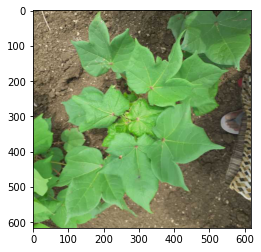

In [25]:
# actual image    
img = plt.imread(r'/content/cotton-disease-dataset/Cotton Disease/train/diseased cotton plant/dd (100)_iaip.jpg')
plt.imshow(img)

In [27]:
# make single prediction
test_image = image.load_img(r'/content/cotton-disease-dataset/Cotton Disease/train/diseased cotton plant/dd (100)_iaip.jpg',target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
model=load_model('/content/inceptionv3_model.h5')
result = model.predict(test_image)
training_set.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [28]:
if result[0][3] == 1:
    prediction = 'fresh cotton plant'
    print(prediction)
elif result[0][2] == 1:
    prediction = 'fresh cotton leaf'
    print(prediction)
elif result[0][1] == 1:
    prediction='diseased cotton plant'
    print(prediction)
elif result[0][0] == 1:
    prediction = 'diseased cotton leaf'
    print(prediction)
else:
    prediction = 'Unknown'
    print(prediction)

diseased cotton leaf
